# Problem

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.



In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.cluster.hierarchy import linkage ,dendrogram,fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler 
import warnings
warnings.filterwarnings('ignore')

In [3]:
bank_df = pd.read_csv('bank_marketing_part1_Data-1.csv')

In [4]:
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [5]:
bank_df.shape

(210, 7)

In [6]:
bank_df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [7]:
bank_df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [8]:
bank_df.duplicated().sum()

0

In [9]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


# Exploratory data analysis 

In [10]:
def describe(col,nbins):
    print('\n\n Description of',col)
    print('------------------------------------------------')
    print(bank_df[col].describe(),end = ' ')

In [11]:
lst_num = bank_df.columns.values
len(lst_num)

7

In [12]:
for i in lst_num:
    describe(i,20)



 Description of spending
------------------------------------------------
count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: spending, dtype: float64 

 Description of advance_payments
------------------------------------------------
count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: advance_payments, dtype: float64 

 Description of probability_of_full_payment
------------------------------------------------
count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64 

 Description of current_balance
------------------------------------------------
count    210.000000
mean       5.628533
std        0.443063
mi

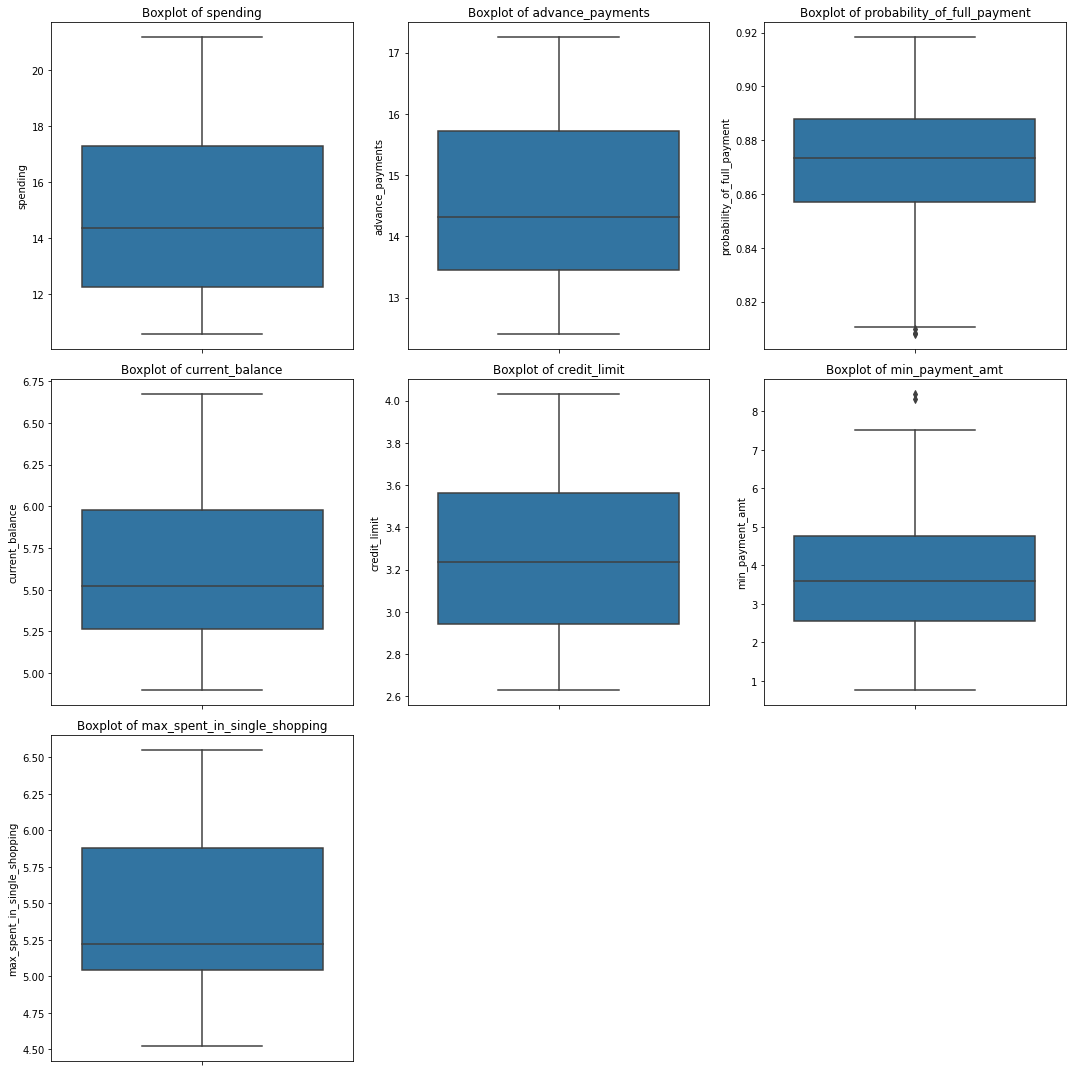

In [13]:
plt.figure(figsize = (15,15))
box = bank_df.columns
for i in range(len(box)):
    plt.subplot(3,3,i+1)
    sns.boxplot(y = bank_df[box[i]],data = bank_df)
    plt.title('Boxplot of {}'.format(box[i]))
    plt.tight_layout()

Min_payment_amt,Probabilty of full payments  columns has outliers

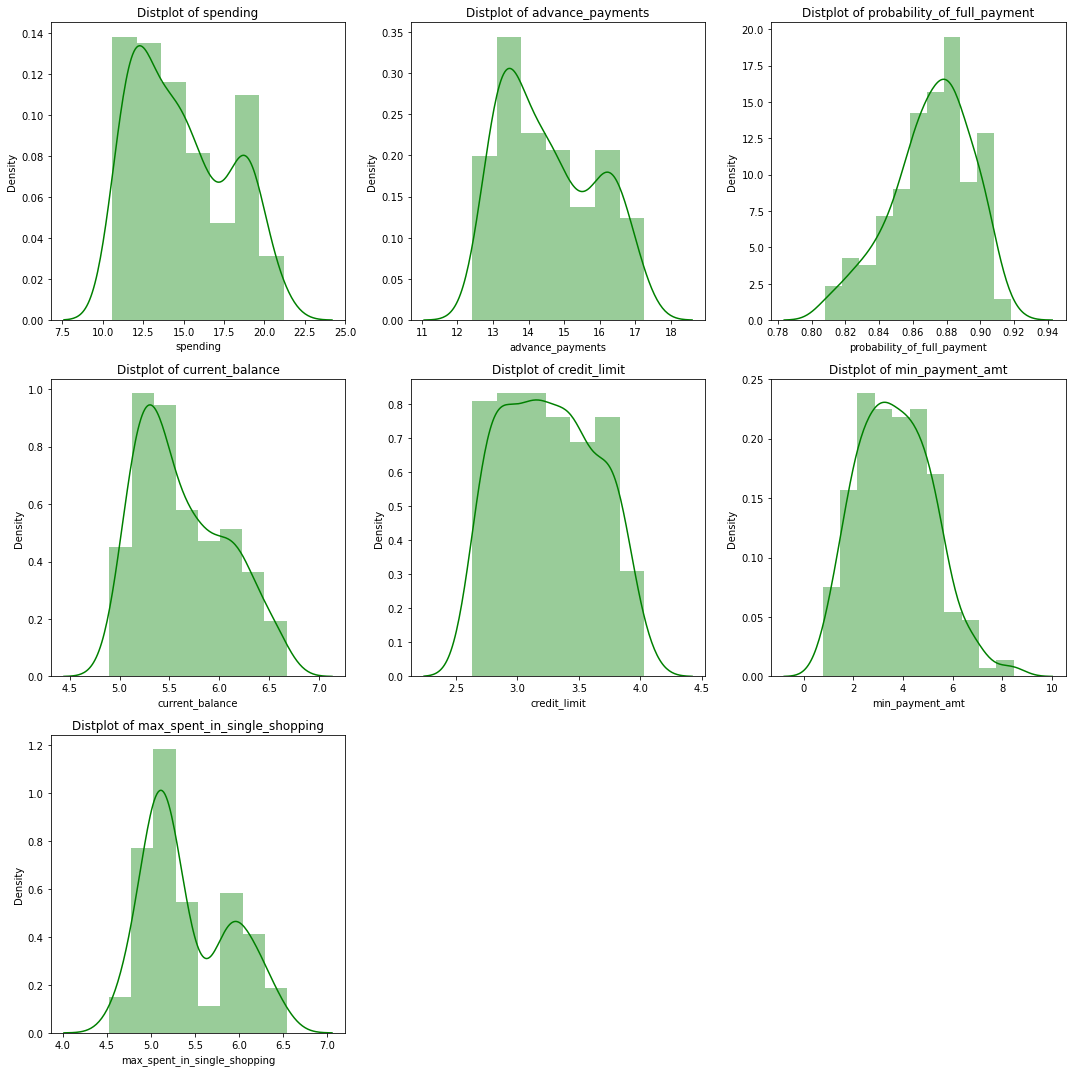

In [14]:
plt.figure(figsize=(15,15))
dist = bank_df.columns
for i in range(len(dist)):
    plt.subplot(3,3,i+1)
    sns.distplot(bank_df[dist[i]],kde = True,color = 'g')
    plt.title('Distplot of {}'.format(dist[i]))
    plt.tight_layout()

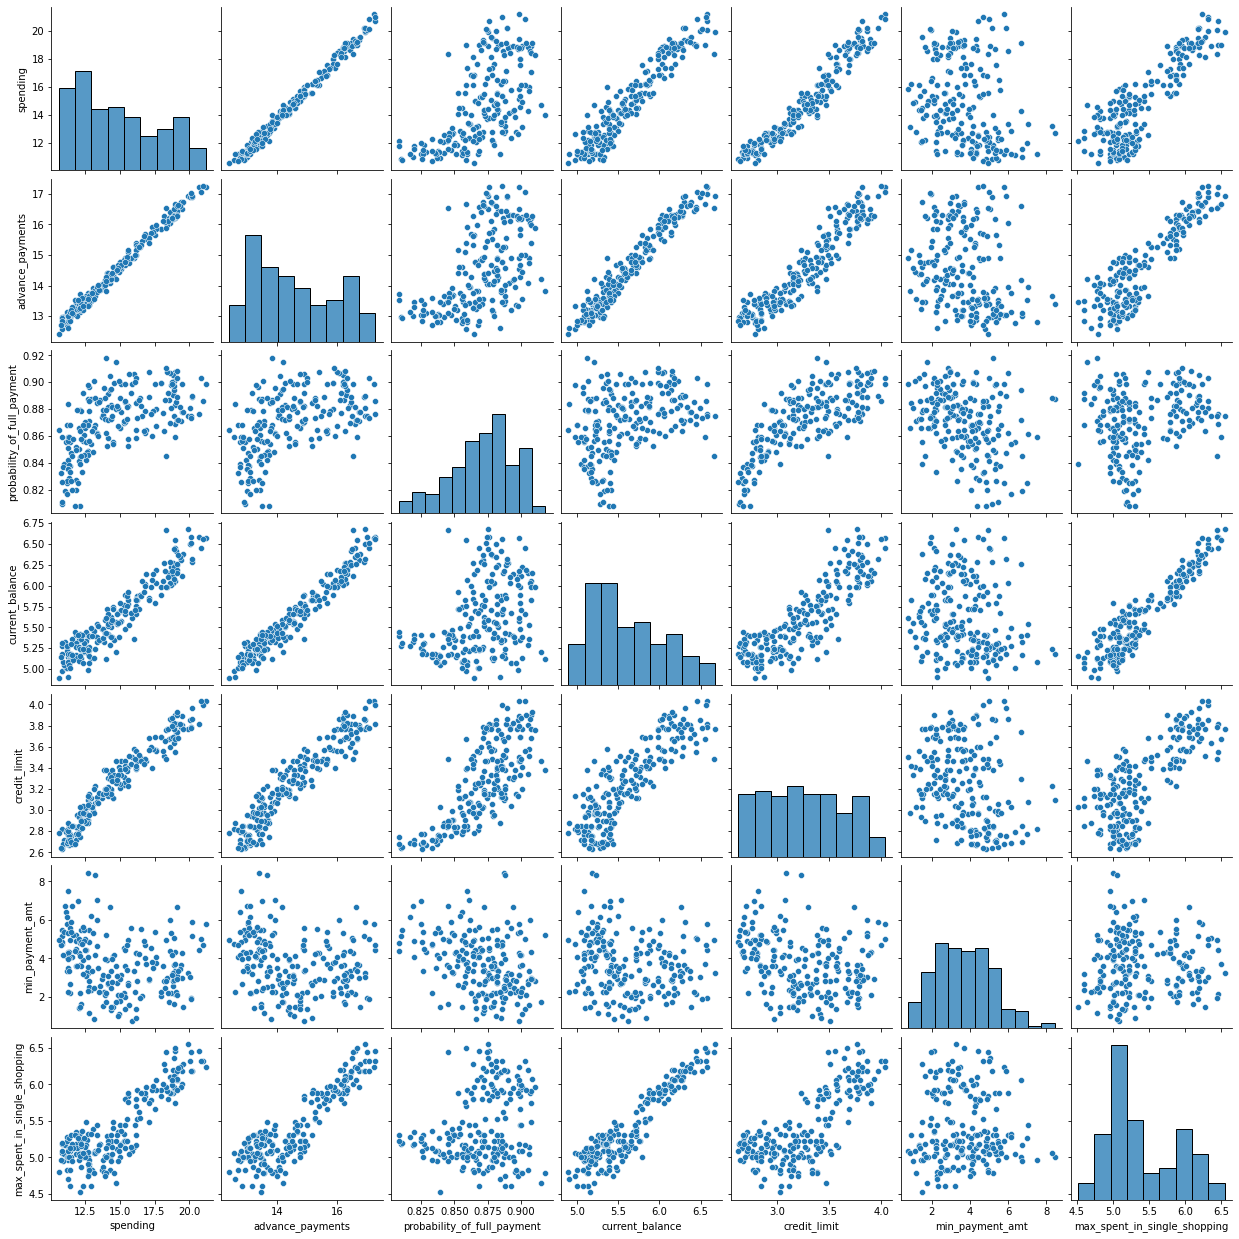

In [15]:
sns.pairplot(bank_df)

In [16]:
corr = bank_df.corr()
corr

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


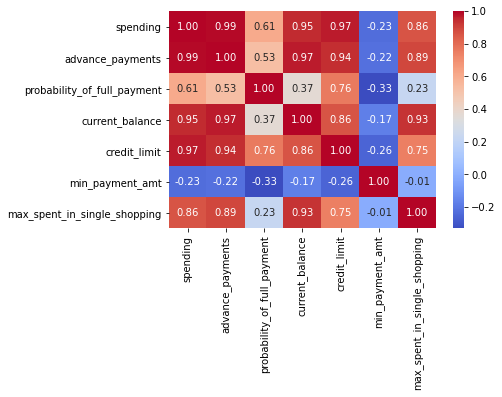

In [17]:
sns.heatmap(corr,cmap = 'coolwarm',fmt = '0.02f', annot  =True)
plt.show()

# High correlation :
    1.spending vs advanced payments
    2.spending vs current balance
    3.spending vs credit_limit
    4.advanced payments vs current balance
    5.advanced payments vs credit_limit
    6.max_spend_in_single_shopping vs current balance ,advanced payments,spending
    7.credit limit vs current balance 

In [18]:
bank_df['min_payment_amt'].value_counts()

2.221    2
2.129    2
2.700    2
1.999    1
4.539    1
        ..
5.780    1
1.415    1
3.412    1
4.266    1
5.588    1
Name: min_payment_amt, Length: 207, dtype: int64

values are in the different levels. so need to scaling because the model is based on distance based computations 

In [19]:
bank_df_scaled = bank_df.apply(zscore)

In [20]:
bank_df_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


In [21]:
wardlink = linkage(bank_df, method = 'ward')

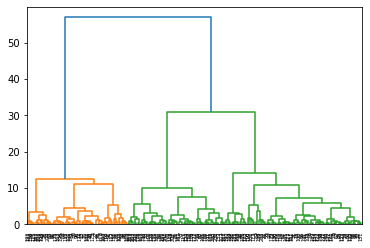

In [22]:
dend = dendrogram(wardlink)

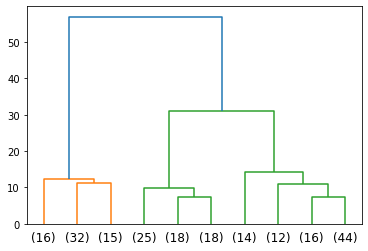

In [23]:
dend = dendrogram(wardlink,truncate_mode = 'lastp',p = 10)

from the dendrogram the data clustered into 3 clusters

In [25]:
cluster = fcluster(wardlink,3,criterion = 'maxclust')
cluster

array([1, 2, 1, 3, 1, 3, 3, 2, 1, 3, 1, 2, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3,
       1, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 1,
       3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 2, 3, 3, 2, 2, 1,
       1, 2, 1, 3, 2, 3, 1, 1, 3, 1, 2, 3, 1, 2, 2, 3, 2, 1, 3, 2, 2, 2,
       1, 3, 3, 1, 2, 3, 3, 1, 1, 1, 3, 1, 3, 1, 2, 1, 2, 1, 1, 3, 3, 1,
       2, 2, 1, 3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 3, 2, 2, 1, 3, 2, 2, 3, 2,
       3, 1, 3, 1, 1, 3, 1, 2, 2, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 2, 2,
       3, 2, 3, 3, 2, 1, 1, 3, 1, 1, 1, 3, 2, 2, 3, 3, 2, 3, 2, 1, 1, 1,
       2, 3, 2, 3, 2, 2, 3, 2, 2, 1, 3, 2, 3, 3, 3, 2, 3, 1, 2, 1, 1, 3,
       1, 3, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2], dtype=int32)

In [26]:
bank_df['cluster'] = cluster

In [27]:
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,3
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [28]:
bank_df['cluster'].value_counts().sort_index()

1    63
2    61
3    86
Name: cluster, dtype: int64

# cluster profile

In [29]:
aggdata = bank_df.groupby('cluster').mean()

In [31]:
aggdata['freqency'] = bank_df['cluster'].value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freqency
cluster,,,,,,,,
1,18.615873,16.259524,0.883937,6.194603,3.708143,3.659413,6.060952,63
2,14.920164,14.579344,0.881487,5.608033,3.314852,2.684805,5.221951,61
3,12.035465,13.299535,0.854081,5.228395,2.889395,4.450303,5.061814,86


# K - Means

In [32]:
k_means = KMeans(n_clusters = 3,random_state = 0)

In [33]:
k_means.fit(bank_df_scaled)

KMeans(n_clusters=3, random_state=0)

In [34]:
k_means.labels_

array([2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2,
       2, 0, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 2, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0])

In [35]:
#within the cluster sum of squears
k_means.inertia_

430.6589731513006

In [36]:
#Calculating the wss plot
wss = []
for i in range(1,11):
    KM = KMeans(n_clusters = i , random_state = 1)
    KM.fit(bank_df_scaled)
    wss.append(KM.inertia_)

In [37]:
wss

[1470.0000000000002,
 659.1717544870406,
 430.6589731513006,
 371.30172127754213,
 327.96082400790317,
 290.590030596822,
 264.8315308747815,
 240.68372595015978,
 220.85285825594738,
 206.38291036015787]

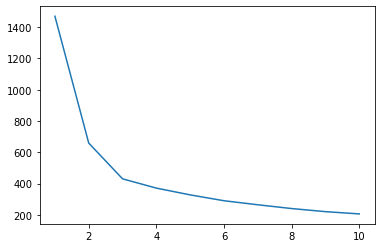

In [39]:
plt.plot(range(1,11),wss)

In [40]:
K_means = KMeans(n_clusters= 3,random_state = 1)
K_means.fit(bank_df_scaled)
labels = K_means.labels_

In [41]:
silhouette_score(bank_df_scaled,labels = K_means.labels_,random_state = 1)

0.40072705527512986

In [42]:
df = pd.read_csv('bank_marketing_part1_Data-1.csv')

In [43]:
labels

array([1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 1,
       1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2,
       1, 0, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 1,
       2, 2, 1, 0, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1,
       2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 0, 1, 2, 1, 1, 0,
       1, 0, 2, 1, 2, 0, 1, 2, 1, 2, 2, 2])

In [44]:
df['k_means'] = labels

In [45]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,k_means
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [46]:
df['k_means'].value_counts().sort_index()

0    72
1    67
2    71
Name: k_means, dtype: int64

In [48]:
aggdata1 = df.groupby('k_means').mean()
aggdata1

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
k_means,,,,,,,
0,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722
1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803
